# Lab 6: The Logistic Map

# <span style="color:blue"> In this lab session, you will learn how to generate the logistic map:</span>
- ### numerically
- ### via a time series plot
- ### using a cobweb diagram
- ### via a bifurcation graph

## The Logistic Map
The logistic map is one of the simplest mathematical models for population dynamics that exhibits a wealth of interesting behavior. It is given by the iterative relation

<div class = "alert alert-info">
$$x_{n+1} = r \, x_{n}(1 - x_{n})$$  
</div>

where $x_{n}$ is the normalized population of a species at the $n$-th generation (i.e. we set $x_n=1$ to be the maximum possible population in this model). It relates $x_{n+1}$, the population at the next generation, in terms of the current population $x_n$. 


To understand it intuitively, we write it as $\frac{x_{n+1}}{x_n}=r (1-x_n)$. The left-hand side $x_{n+1}/x_n$ is ratio between the populations of the $n$-th and $(n+1)$-th generations. The right-hand side expresses it in terms of an intrinsic growth rate $r$ that is multiplied by remaining growth capacity $1-x_n$. Hence the population will increase if $r(1-x_n)>1$, which is satisfied either at sufficiently large $r$ or sufficently low population $x_n$. When $x_n=1$, the population must stop growing.


In this model, there is only one adjustible parameter, $r$. We shall only consider cases where $ 0 \leq r \leq 4 $, because we need:

- $r \neq 0$: Otherwise no story to tell anymore ...
- $r \leq 4$: If we have $r \gt 4$, some values of $x_{n+1}$ will exceed 1, which causes the population to explode exponentially, contradicting the requirement that $x_n\leq 1$. To show this, let us write $x_{n+1} =f(x_n)$ where $f(x)=rx(1-x)$. Consider finding the maximum of $f(x)$ via calculus. Differentiating, we can show that the maximum is $r/4$. Hence if $r>4$, $x_{n+1}=f(x_n)$ can exceed one, which is not allowed.
- $r \gt 0 $: negative population does not make sense.

To sum up, the constraints are: $ 0 \leq r  \leq 4 $ and $ 0 \leq x_{n} \leq 1 $. To model the population of a species in real life, we can define $x_n$ as the actual population divided by the theoretically maximum population. 

The equilibrium population $x^*$ can be found by setting $x_{n+1}=x_n=x^*$, such that

$$ x^*=1-\frac1{r}$$

This can be obtained by solving $f(x^*)=x^*$.

## Assumptions/requirements for logistic map description:

- Only one type of population, no antagonistic relationship between different populations i.e. prey and predators
- "Memoryless" i.e. $x_{n+1}$ depends only on $x_n$
- Depends on a fixed parameter $r$, which does not depend on time $n$ (no seasonality involved)

## Visualising the population sequence generated via $x_{n+1} = r \, x_{n}(1 - x_{n})$ ###

Although we can generate as many iterates as we want, it is hard to understand the "general picture" unless we visualize it through various types of plots. The simplest thing would be to just print the numberical sequence and then plot the sequence $x_n$ as a function of $n$:

In [15]:
# Generating a numerical sequence from the logistic map

x = 0.1   # Initial population; test with (x0,r) = [0.1,0.5], [0.1,2.0], [0.5,2.5], [0.5,3.0], [0.8,3.5], [0.8,3.75]
r = 0.5   # Intrinsic growth rate; try to substitue x* (= 0.5) with r = 2.0 say; notice the equlilbrium in populations
# x* = 1 - 1/r
print(f"x0 = {x}     r = {r}\n")

nIteration = 99   # Number of iterations to compute

print("n\tx[n]")
print("---------------------")
print(0,f"\t{x:.8f}")

# Compute and print results of successive iterations
for n in range(nIteration):   # 99 iterations
    x = r*x*(1.0-x)
    print(n+1,f"\t{x:.8f}")

x0 = 0.1     r = 0.5

n	x[n]
---------------------
0 	0.10000000
1 	0.04500000
2 	0.02148750
3 	0.01051289
4 	0.00520119
5 	0.00258707
6 	0.00129019
7 	0.00064426
8 	0.00032192
9 	0.00016091
10 	0.00008044
11 	0.00004022
12 	0.00002011
13 	0.00001005
14 	0.00000503
15 	0.00000251
16 	0.00000126
17 	0.00000063
18 	0.00000031
19 	0.00000016
20 	0.00000008
21 	0.00000004
22 	0.00000002
23 	0.00000001
24 	0.00000000
25 	0.00000000
26 	0.00000000
27 	0.00000000
28 	0.00000000
29 	0.00000000
30 	0.00000000
31 	0.00000000
32 	0.00000000
33 	0.00000000
34 	0.00000000
35 	0.00000000
36 	0.00000000
37 	0.00000000
38 	0.00000000
39 	0.00000000
40 	0.00000000
41 	0.00000000
42 	0.00000000
43 	0.00000000
44 	0.00000000
45 	0.00000000
46 	0.00000000
47 	0.00000000
48 	0.00000000
49 	0.00000000
50 	0.00000000
51 	0.00000000
52 	0.00000000
53 	0.00000000
54 	0.00000000
55 	0.00000000
56 	0.00000000
57 	0.00000000
58 	0.00000000
59 	0.00000000
60 	0.00000000
61 	0.00000000
62 	0.00000000
63 	0.00000000

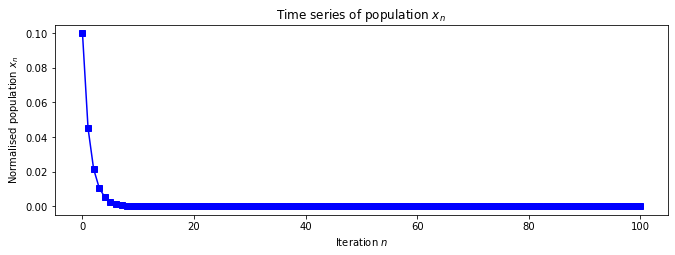

In [16]:
# Plotting the sequence
import matplotlib.pyplot as plt

x = [0.1]   # Initial population; test with (x0,r) = [0.1,0.5], [0.1,2.0], [0.5,2.5], [0.5,3.2], [0.5,3.5], [0.5,3.75],
r = 0.5     # Intrinsic growth rate                 [0.5,3.85], [0.5,3.95]
# x* = 1 - 1/r
nIteration = 100   # Number of iterations

# Generate sequence
for n in range(nIteration):      # n corresponds to list index: 0,...,nInteration-1  
    x.append(r*x[n]*(1.0-x[n]))  # Append next population into list by taking value of previous population from list

# Visualisation of results
width,height = 11,3.5 
plt.figure(1,(width,height))   # Set figure size with stipulated width and height

# Visualizing the whole sequence 
plt.plot(x,"bs-")   # If only one set of data is specified, it will be plotted along the y axis
plt.title("Time series of population $x_n$ ")
plt.xlabel("Iteration $n$"); plt.ylabel("Normalised population $x_n$")
plt.show()

## Key regimes/types of phenomena

- 1 . $0<r<1$: population always decreases exponentially i.e. in an extinction scenario (equilibrium at 0)

- 2a. population converges towards the equilibrium value, or more generally,

- 2b. population will oscillate for a while, but still converges eventually towards the equilibrium value

- 3a. population will oscillate in a simple way, and not tend towards any unique equilibrium value (limit cycle), or more generally,

- 3b. population oscillates in a complicated way, but is still periodic (limit cycle)

- 4 . population oscillates randomly forever (chaotic), without ever repeating

Equilibrium value $x^*=1-1/r$ only applies for $1\leq r \leq 4$.

For small enough $r$, the population will tend towards the equilibrium value inevitably. This equilbrium value of $x^*$ is not the same as the carrying capacity, which is always defined to be $1$.

### For what values of $r$ is the sequence (evolved population) very sensitive to initial $x_0$?

While the behavior for small $r$ is usually clear-cut, either stabilizing at one value of $x_n$ or oscillating regularly between a few different $x_n$, the behavior at larger $r$ (see later for how large) is harder to fathom. 

## Steady state behavior

To clarify the behavior, we can simply **discard fluctuations until the sequence has stabilised** into some sort of pattern (discard transients). This also allows us to focus only on a small number of oscillations, facilitating visual inspection. Indeed:

- Notice that starting from an arbitrary $x_{0}$, it takes us a number of iterations before we get onto the periodic points – unless of course if $x_{0}$ is already one of the periodic points.
- In other words, the system eventually goes from the initial state to the steady state, separated by a transient stage. **But not all steady states are periodic states--chaos is also possible** (we'll see this later).
- For a particular value of $r$, different values of $x_{0}$ may lead to different steady states.
- To ﬁnd out what the steady state is for a particular $r$ and $x_{0}$, we shall ignore the transients.

51


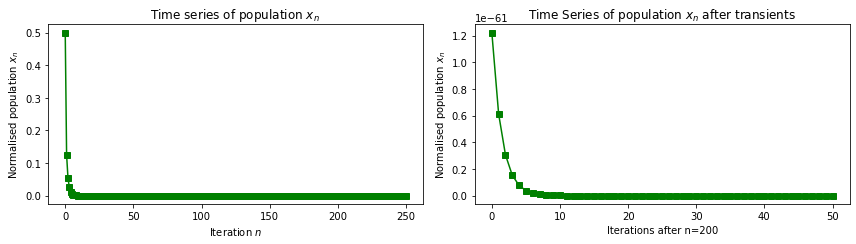

In [17]:
# Plotting the sequence with and without transients

import matplotlib.pyplot as plt

x = [0.5]   # Initial population; test with x0 = [0.1, 0.5], r = [0.5,2.0,3.5,3.95]
r = 0.5     # Intrinsic growth rate

nIteration = 250   # Number of iterations

# Generate sequence
for n in range(nIteration):       # n corresponds to list index: 0,...,nInteration-1    
    x.append(r*x[n]*(1.0-x[n]))   # Append next population into list by taking value of previous population from list
                                  # There will be (nIteration + 1) number of populations in list; 
                                  # Last population stored at index [nInteration]
# Visualisation of results
width,height = 12,3.5 
plt.figure(1,(width,height))   # Set figure size with stipulated width and height

# Visualising the whole sequence 
plt.subplot(1,2,1)   # 1st subplot of a (1,2) layout of subplots
plt.plot(x,"gs-")
plt.title("Time series of population $x_n$ ")
plt.xlabel("Iteration $n$"); plt.ylabel("Normalised population $x_n$")

# Visualising the sequence from n = trans_end and after 
trans_end = 200;   # trans_end number of data points to be discarded

plt.subplot(1,2,2)   # 2nd subplot of a (1,2) layout of subplots
y = x[trans_end:nIteration+1]   # Data taken from x[trans_end] to x[nIteration]; 
print(len(y))                   # trans_end number of data points are discarded
plt.plot(y,"gs-")
plt.title("Time Series of population $x_n$ after transients")
plt.xlabel(f"Iterations after n={trans_end}"); plt.ylabel("Normalised population $x_n$")   

plt.tight_layout()
plt.show()

For some larger $r>3.5$, the periods become highly complicated, and it is not clear if the sequence $x_n$ repeats, if at all. An important observation is: 

<div class = "alert alert-info">
    
**The form of the logistic map depends only on $x_n$ and $x_{n+1}$, and no other earlier values in the sequence, so knowledge of _two successive values_ of the sequence is sufficient in characterising the exact nature of the entire sequence.**
    
</div>

In other words, this means that we just need to **plot $x_{n+1}$ against $x_n$** to distill the nature of the oscillations. The number of distinct positions of the point $(x_n,x_{n+1})$, after the transients have died down, is the period of the oscillation.

51


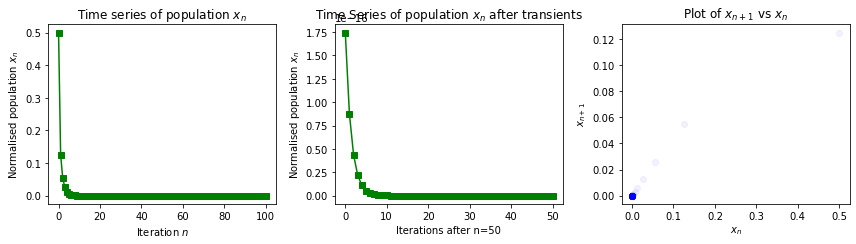

(xn,xnp)
------------------------------
(0.0000000000, 0.0000000000)
(0.0000000000, 0.0000000000)
(0.0000000000, 0.0000000000)
(0.0000000000, 0.0000000000)
(0.0000000000, 0.0000000000)
(0.0000000000, 0.0000000000)
(0.0000000000, 0.0000000000)
(0.0000000000, 0.0000000000)
(0.0000000000, 0.0000000000)
(0.0000000000, 0.0000000000)


In [37]:
# Plotting the sequence with and without transients, and exploring the relationship between x_{n+1} and x_{n}

import matplotlib.pyplot as plt

x = [0.5]   # Initial population; test with r = [0.5,2.5,3.2,3.6,3.95]
r = 0.5     # Intrinsic growth rate

nIteration = 100   # Number of iterations

# Generate sequence
for n in range(nIteration):       # n corresponds to list index: 0,...,nInteration-1    
    x.append(r*x[n]*(1.0-x[n]))   # Append next population into list by taking value of previous population from list
                                  # There will be (nIteration + 1) number of populations in list; 
                                  # Last population stored at index [nInteration]
# Visualisation of results
width,height = 12,3.5 
plt.figure(1,(width,height))   # Set figure size with stipulated width and height

# Visualising the whole sequence 
plt.subplot(1,3,1)   # 1st subplot of a (1,3) layout of subplots
plt.plot(x,"gs-")
plt.title("Time series of population $x_n$ ")
plt.xlabel("Iteration $n$"); plt.ylabel("Normalised population $x_n$")

# Visualising the sequence from n = trans_end and after 
trans_end = 50;   # trans_end number of data points to be discarded

plt.subplot(1,3,2)   # 2nd subplot of a (1,3) layout of subplots
y = x[trans_end:nIteration+1]   # Data taken from x[trans_end] to x[nIteration]; 
print(len(y))                   # trans_end number of data points are discarded
plt.plot(y,"gs-")
plt.title("Time Series of population $x_n$ after transients")
plt.xlabel(f"Iterations after n={trans_end}"); plt.ylabel("Normalised population $x_n$")

# Visualising x_{n+1} against x_n to check for periodicity
plt.subplot(1,3,3)   # 3rd subplot out of a (1,3) grid of subplots
xn = x[0:nIteration]      # List xn: x[0]-->x[nIteration-1]; nIteration number of data points
xnp = x[1:nIteration+1]   # List xnp: x[1] --> x[nIteration]; nIteration number of data points

plt.plot(xn,xnp,"bo",alpha=0.05)            # Plot x_{n+1} vs x_{n}
plt.title("Plot of $x_{n+1}$ vs $x_{n}$")   # Transparency of 0.03 allow us to visualise periodic points 
plt.xlabel("$x_{n}$"); plt.ylabel("$x_{n+1}$")
plt.tight_layout()
plt.show()   

# Printing the numerical sequence of the last ten data points in x_{n+1} vs x_{n}
print("(xn,xnp)")
print("-" * 30)
for n in range(nIteration-9, nIteration+1):   # Print the last ten items in list
    print(f"({x[n-1]:.10f}, {x[n]:.10f})")

### Questions for thought

What are some values of $r$ where the oscillations have the following periodicities? 
- Periodic one (one post-transient point in the plot of $x_{n+1}$ vs $x_{n}$)
- Periodic two (two post-transient points in the plot of $x_{n+1}$ vs $x_{n}$) 
- Periodic three (three post-transient points in the plot of $x_{n+1}$ vs $x_{n}$)
- Periodic four (four post-transient points in the plot of $x_{n+1}$ vs $x_{n}$)
- Periodic eight (eight post-transient points in the plot of $x_{n+1}$ vs $x_{n}$)

## Sensitivities to system parameters and initial conditions
How the system behaves in the long-time limit (i.e. for large enough $n$) depends on the value of the system parameter $r$. As $r$ is varied, we have fixed point → periodic points → chaotic oscillations → periodic points → chaotic oscillations... . In some domain of $r$ values, the behaviours of two systems vary drastically even when their difference in $r$ is very small. We say there is sensitive dependence on the system parameter. For some domain of $r$ values, the behaviours of two systems, with the same $r$ value, vary drastically even when their difference in the initial values is very small. We say there is 
sensitive dependence on the initial values.

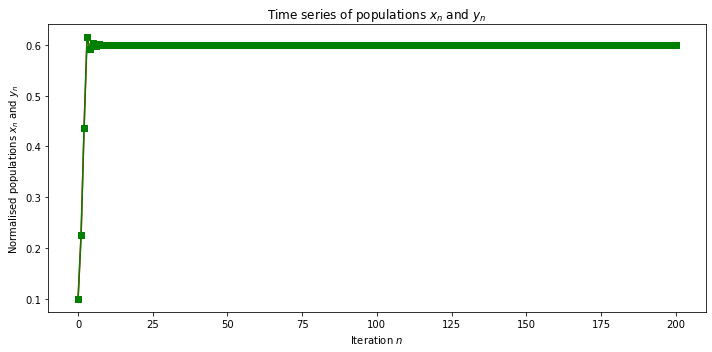

In [19]:
# Demonstrating sensitivity to system parameter
import matplotlib.pyplot as plt

# x and y are two populations obeying the logistic equation
x = [0.1]   # Initial population for x
y = [0.1]   # Initial population for y
r1 = 2.5   # Intrinsic growth rate; behaviour not so sensitive for certain r value variations
r2 = 2.50001   # Try (r1,r2) = (3.1,3.10001)

#r1 = 3.65       # But not for other r value variationss
#r2 = 3.650001

nIteration = 200   # Number of iterations

# Generate sequence
for n in range(nIteration):
    x.append(r1*x[n]*(1.0-x[n]))
    y.append(r2*y[n]*(1.0-y[n]))

# Visualisation of results
width,height = 10,5
plt.figure(1,(width,height))   # Set figure size with stipulated width and height

# Visualising the whole sequence
plt.plot(x,"rs-")
plt.plot(y,"gs-")
plt.title("Time series of populations $x_n$ and $y_n$")
plt.xlabel("Iteration $n$"); plt.ylabel("Normalised populations $x_n$ and $y_n$")

plt.tight_layout()
plt.show()

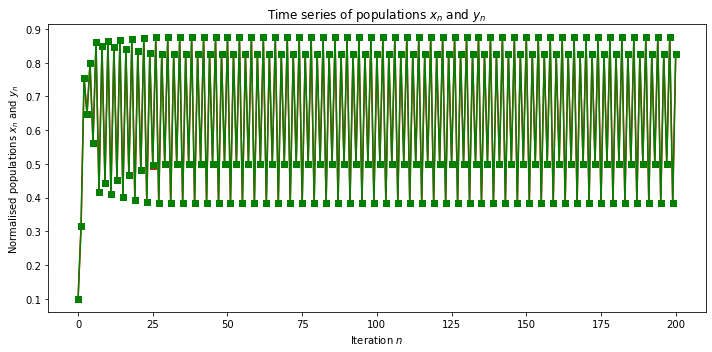

In [20]:
# Demonstrating sensitivity to initial values
import matplotlib.pyplot as plt

# x and y are two populations obeying the logistic equation
x = [0.1]       # Initial population for x
y = [0.10001]   # Initial population for y
r = 3.5   # Intrinsic growth rate; behaviour not so sensitive for certain initial condition variations at certain r values
#r = 3.9   # But not for other r values

nIteration = 200   # Number of iterations

# Generate sequence
for n in range(nIteration):
    x.append(r*x[n]*(1.0-x[n]))
    y.append(r*y[n]*(1.0-y[n]))

# Visualisation of results
width,height = 10,5
plt.figure(1,(width,height))   # Set figure size with stipulated width and height

# Visualising the whole sequence
plt.plot(x,"rs-")
plt.plot(y,"gs-")
plt.title("Time series of populations $x_n$ and $y_n$")
plt.xlabel("Iteration $n$"); plt.ylabel("Normalised populations $x_n$ and $y_n$")

plt.tight_layout()
plt.show()

## Cobweb diagram as an intuitive way of understanding Logistic map dynamics

There is a visually intuitive way to understand why certain $r$ leads to far more complicated oscillations than others. This is done through a cobweb diagram, which expresses the transitions between successive $x_n$ as the trajectory of a "bouncing" ball in the $x_n$ and $x_{n+1}$ plane.

- We start from a point $(x_n,0)$ in the $x_n$ and $x_{n+1}$ plane. We draw a straight vertical line towards the point $(x_n,x_{n+1})$ on the function curve $y=x_{n+1}=f(x_n)$. 

- This gives us $x_{n+1}$. Then, we draw a straight horizontal line towards the point $(x_{n+1},x_{n+1})$. 

- This gives us the next point, and we repeat the preceding steps to obtain the future iterations. 

Since each step gives us a vertical line followed by a horizontal line, we eventually obtain a cobweb-like diagram.

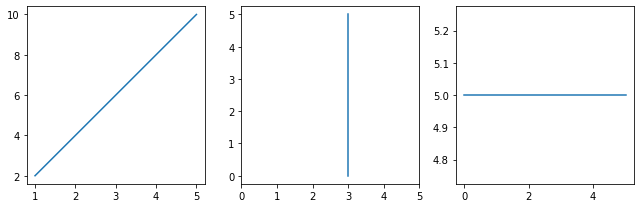

In [21]:
# In order to understand how to generate the coweb diagram, let's take a look at how line plots can be
# generated using two coordinate points

import matplotlib.pyplot as plt

plt.figure(1,(9,3))
plt.subplot(1,3,1)
plt.plot([1,5],[2,10])   # Plotting by specifying co-ordinates of two points: [1,2] & [5,10]
                         # Take note of the order of data entries: [x1, x2] & [y1, y2] 
plt.subplot(1,3,2)
plt.plot([3,3],[0,5])    # Plotting a vertical line
plt.xticks(range(0,6))   # Setting x tick marks

plt.subplot(1,3,3)
plt.plot([0,5],[5,5])    # Plotting a horizontal line

plt.tight_layout()
plt.show()

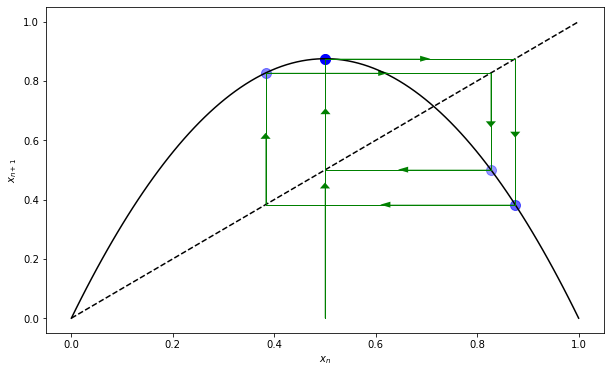

In [34]:
# Cobweb diagram

import matplotlib.pyplot as plt
import numpy as np
    
# Define cobweb plot function: 
# f is the function to be iterated
# x0 is the initial value
# iterno is the number of iterations to compute
# x_min and x_max specifies the x region to plot, default is [0,1]

def cobweb(f, x0, iterno, x_min=0, x_max=1):   # Parameters can be initialised in function header
        # Plot the function f
        N = 100   # Resolution of this function f curve
        xx = np.linspace(x_min, x_max, N)   # N x data points to plot laogistic map function
        plt.plot(xx, f(xx), 'k')
        
        # Plot the dashed line y = x
        plt.plot(xx, xx, "k--")
            
        # Code below plots the actual cobweb
        plt.plot([x0,x0],[0,f(x0)],'g',linewidth=1)   # Plot first vertical line with co-ordinates (x0,0) & (x0,f(x0))
        plt.arrow(x0, 0, 0, f(x0)/2, head_width=0.02, head_length=0.02, fc='g', ec='g',linewidth=0)   # Plot arrowhead only
        
        # Arrow syntax: (x, y, dx, dy, **kwargs) parameters: 
        # x, y: x and y coordinates of the arrow base. 
        # dx, dy: length of the arrow along x and y direction. 
        # **kwargs: Optional arguments that help in adding properties to arrow, like color, width, etc.        
               
        x, y = x0, x0   # Initial position of point (x,y)
        
        for n in range(iterno):   # Interate iterno of times
                  
            if 0<n<(iterno):   # Condition will not hold true first time since n = 0
                # Plot horizontal line and arrow in cobweb
                # Plot line by joining two points [x,y] and [y,y]
                plt.plot([x, y], [y, y], 'g', linewidth=1)   # 1st hor line co-ordinates: (x0,x1) & (x1,x1)
                                                             # 2nd hor line co-ordinates: (x1,x2) & (x2,x2), etc
               
                plt.arrow(x, y, (y-x)/2, 0, head_width=0.02, head_length=0.02, fc='g', ec='g',linewidth=0) 
                # (y-x)/2: horizontal length of arrow divided by 2; to set position of arrowhead   
            
                # Plot vertical line and arrow in cobweb
                # Plot line by joining two points [y,y] and [y,f(y)]
                plt.plot([y, y], [y, f(y)], 'g', linewidth=1) # 2nd ver line co-ordinates: (x1,x1) & (x1,x2)
                                                              # 3rd ver line co-ordinates: (x2,x2) & (x2,x3), etc
                    
                plt.arrow(y, y, 0, (f(y)-y)/2, head_width=0.02, head_length=0.02, fc='g', ec='g',linewidth=0) 
                # (f(y)-y)/2: vertical length of arrow divided by 2; to set position of arrowhead
                               
            x, y = y, f(y)   # Update (x,y) to (y,f(y)) for the next iteration 
                             # 1st iteration: (x0,x1)
                             # 2nd iteration: (x1,x2)            
            
            # Plot point, with some aesthetic effects
            plt.scatter(x,y,marker='o',s=100,c='b',alpha=0.8/(n+1)+0.2)   # Transparency adjustment for alpha in accordance
                                                                          # to iterations 
           
            #plt.text(x,y-0.05,f"x[{n}] = {x:.2f}")   # Labelling of point, comment this line if graph looks messy!
                              
                           
# Program starts executing here        
plt.figure(1,(10,6))
plt.xlabel("$x_{n}$"); plt.ylabel("$x_{n+1}$")

r = 3.5                  # Try (0.5,2.0,3.5,3.9)
f = lambda x: r*x*(1-x)   # Specifies logistic map, code will work for generic form of f

cobweb(f, 0.5, 5)   # Calls cobweb function

## To see the bigger picture: Bifurcation Diagram

In the above, we have already seen how to concretely visualise the behavior given a specific value of $r$ and initial value $x_0$. However, the behavior at a certain $r$ may be very different from the behavior at a nearby value of $r$. To see the bigger picture, we introduce the bifurcation diagram, which is basically a **plot of all the possible long-time i.e. asymptotic values of $x_n$ obtained from each value of $r$**.

In practice, for each $r$, we plot all the possible values visited by all $x_n$ (i.e. orbits) for sufficiently large $n$, after transient behavior has died down. The initial value should be randomly chosen, since a constant initial value may be trapped in its own basin of attraction (for example, try $x_0=0$ and see what happens).

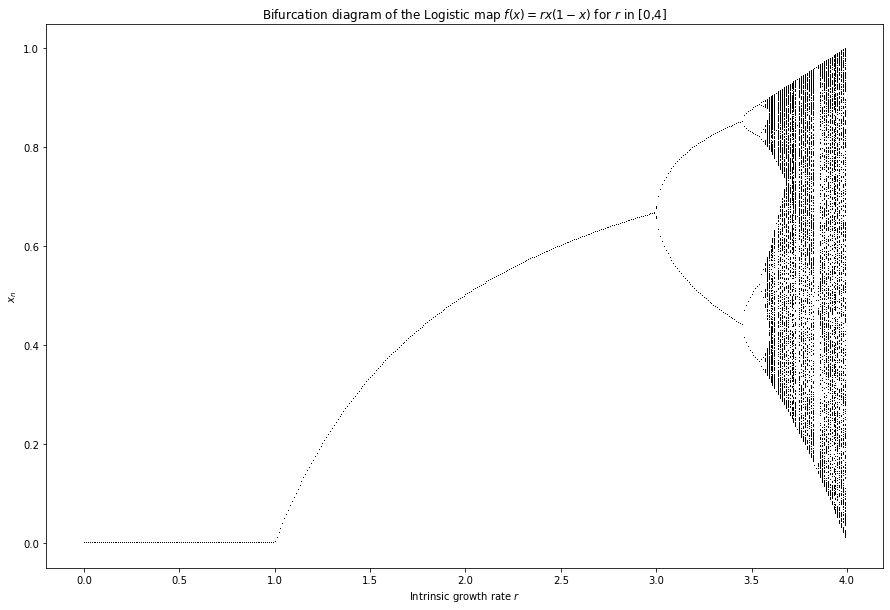

In [35]:
# Bifurcation Diagram

import matplotlib.pyplot as plt
import numpy as np

# Specify range for plotting parameter r
rLow,rHigh = 0, 4

# Set up the plot
width, height = 15.0, 10.0
plt.figure(1,(width,height))

nTransient = 400   # Number of transients  
nIteration = 800   # Number of iterations to compute for each r: the larger the denser the plot

nStep = 400   # Number of steps in the r direction: the larger, the finer is the resolution in the r direciton
rInc = (rHigh - rLow)/nStep   # Increment of r across each step

for r in np.arange(rLow,rHigh,rInc):   # Sweeps over all values of r to be plotted
    x = [np.random.rand()]             # For each r, generate a random initial value x0 from 0 to 1
    
    for n in range(nIteration):
        x.append(r*x[n]*(1-x[n]))    # Generates a list x of populations       
    
    # Plot the iterated sequence for each r    
    y = np.copy(x[nTransient:nIteration+1])   # Sequence of data to be plotted along the y-axis;
                                              # they correspond to populations at the steady state
    rsweep = r*np.ones((len(y)))              # x data to be plotted against y; they are the same for each set of y data
    plt.plot(rsweep,y,"k,")         
        

# Set title        
TitleString = f"Bifurcation diagram of the Logistic map $f(x) = rx(1-x)$ for $r$ in [{str(rLow)},{str(rHigh)}]"
plt.title(TitleString)

# Label axes
plt.xlabel("Intrinsic growth rate $r$")
plt.ylabel("$x_{n}$")

# Save figure as a png file
plt.savefig("Bifurcation.png")
plt.show()

We clearly see that there are some values of $r$ which only leads to a few unique values of $x_n$. These are the **limit cycles**. Are $r$ increases, the solutions to $x_n$ often bifurcate successively until the solutions fill up the whole continuum of possible $x_n$. This is **chaotic** behavior. Each bifurcation is reflected as a doubling in the oscillation period. There are some mysterious windows of calm amidst chaos at around $r=3.83$-$3.85$, where the oscillations temporarily exhibit well-defined periods.

## References

1. [Logistic Map](https://en.wikipedia.org/wiki/Logistic_map)

2. [Useful applet for plotting cobweb diagrams of any map](https://www.desmos.com/calculator/unan9xh0og)

3. [Bifurcation diagram](https://www.vanderbilt.edu/AnS/psychology/cogsci/chaos/workshop/BD.html)